ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 01:
Dataset preview:
   EmployeeID         Name   Age  Income
0           1  Zobia Ahmed    25   50000
1           2   Wania Ahmed   28   60000
2           3   Faiqa Ahmed   26   55000
3           4  Hammad Ahmed   30   70000
4           5  Mushaq Ahmed   35   80000

Cluster centroids:
Cluster 0: [1.20000000e+05 4.56666667e+01]
Cluster 1: [5.18888889e+04 2.54444444e+01]
Cluster 2: [8.4125e+04 3.5375e+01]

Confusion Matrix:
[[0 3 4]
 [2 2 2]
 [1 4 2]]

Accuracy: 0.20


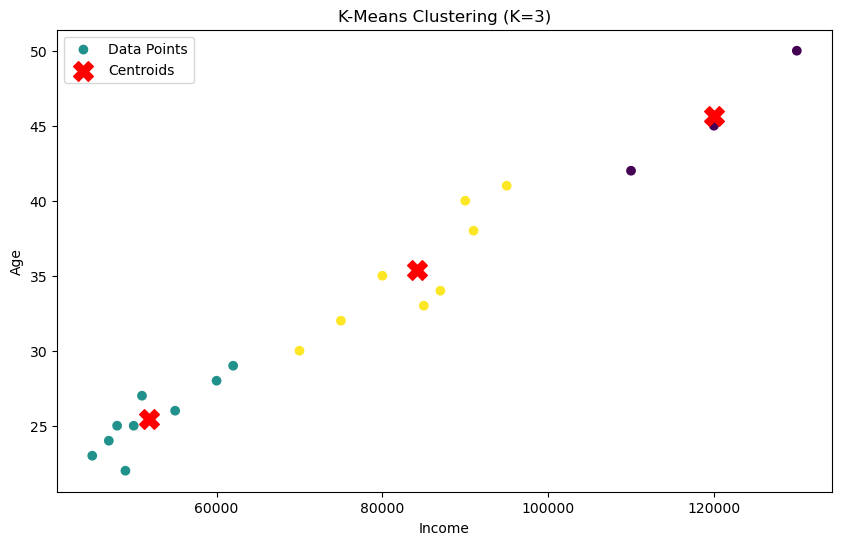

In [81]:
# ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 01
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# Set environment variable to avoid memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")
# Step 1: Load the dataset
data = pd.read_csv('employee_income_zobia.csv')
# Display the first few rows of the dataset to understand its structure
print("ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 01:")
print("Dataset preview:")
print(data.head())
# Step 2: Preprocess the dataset (e.g., handle missing values)
data = data.dropna()  # Drop rows with missing values
# Assuming the relevant columns for clustering are 'Income' and 'Age', extract these features
features = data[['Income', 'Age']]
# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
# Assign cluster labels to the data
data['Cluster'] = kmeans.labels_
# Step 4: Find new centroid values
centroids = kmeans.cluster_centers_
print("\nCluster centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")
# Add a TrueCluster column for demonstration purposes
# Generate sample cluster labels based on the size of the dataset
data['TrueCluster'] = np.random.choice([0, 1, 2], size=len(data))
# Calculate confusion matrix and accuracy (if true labels are available)
if 'TrueCluster' in data.columns:
    confusion = confusion_matrix(data['TrueCluster'], data['Cluster'])
    accuracy = accuracy_score(data['TrueCluster'], data['Cluster'])
    print("\nConfusion Matrix:")
    print(confusion)
    print(f"\nAccuracy: {accuracy:.2f}")
else:
    print("\nTrueCluster column not found. Skipping confusion matrix and accuracy calculation.")
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['Income'], features['Age'], c=data['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('K-Means Clustering (K=3)')
plt.legend()
plt.show()


ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 02:

Cluster centroids:
[[1.  4.  1.5]
 [1.5 1.5 1.5]]


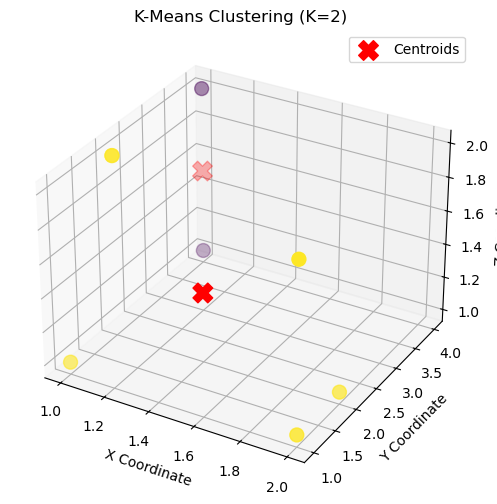

In [83]:
# ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 02:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the dataset
data = {
    'Objects': ['OB-1', 'OB-2', 'OB-3', 'OB-4', 'OB-5', 'OB-6', 'OB-7', 'OB-8'],
    'X': [1, 1, 1, 2, 2, 1, 1, 2],
    'Y': [4, 2, 4, 2, 1, 2, 1, 1],
    'Z': [1, 2, 2, 1, 1, 2, 1, 2]
}
df = pd.DataFrame(data)

# Prepare features for clustering
features = df[['X', 'Y', 'Z']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

print("ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 02:\n")

# Print cluster centers
centroids = kmeans.cluster_centers_
print("Cluster centroids:")
print(centroids)

# Visualize the clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Cluster'], cmap='viridis', s=100)

# Mark centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')

# Labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('K-Means Clustering (K=2)')
ax.legend()
plt.show()

In [37]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
# ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 03:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Create the dataset from the provided data
data = {
    'InvoiceNo': ['536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', 
                  '536365', '536365', '536365', '536365'],
    'StockCode': ['85123A', '71053', '84406B', '84029G', '84029E', '84029D', '84029C', '84879', '84879', '84879', 
                  '84879', '84879', '84879', '84879'],
    'Description': ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEART COAT HANGER', 
                    'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE PINK', 'SET 7 BABUSHKA NESTING BOXES', 
                    'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 
                    'POPPY\'S PLAYHOUSE BEDROOM', 'IVORY KNITTED MUG COSY', 'SET OF 3 CAKE TINS', 'SET OF 3 CAKE TINS', 
                    'SET OF 3 CAKE TINS'],
    'Quantity': [6, 6, 8, 6, 6, 2, 6, 1, 1, 1, 1, 1, 1, 1],
    'InvoiceDate': ['12-12-2010'] * 14,
    'CustomerID': [12346] * 14,
    'Country': ['United Kingdom'] * 14
}

df = pd.DataFrame(data)

# Clean the data
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Remove cancelled transactions (if any exist)
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

# Create the basket for United Kingdom
basket = (df[df['Country'] == "United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Function to encode the units
def encode_units(x):
    return 1 if x >= 1 else 0

# Apply the encoding function using apply
basket_sets = basket.apply(lambda x: x.map(encode_units))

# Drop the POSTAGE item if it exists
if 'POSTAGE' in basket_sets.columns:
    basket_sets.drop('POSTAGE', inplace=True, axis=1)

# Convert to boolean type
basket_sets = basket_sets.astype(bool)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

# Generate association rules (with num_itemsets argument)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))

# Display the first few rules

print("ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 03:\n")
print("\nAssociation Rules:")
print(rules.head())

# Filter rules based on lift and confidence
filtered_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]
print("\nFiltered Rules (Lift >= 6 and Confidence >= 0.8):")
print(filtered_rules)


C:\Users\ABDUL RAFAY\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 03:


Association Rules:
                           antecedents                          consequents  \
0  (GLASS STAR FROSTED T-LIGHT HOLDER)      (CREAM CUPID HEART COAT HANGER)   
1      (CREAM CUPID HEART COAT HANGER)  (GLASS STAR FROSTED T-LIGHT HOLDER)   
2      (CREAM CUPID HEART COAT HANGER)          (HAND WARMER RED POLKA DOT)   
3          (HAND WARMER RED POLKA DOT)      (CREAM CUPID HEART COAT HANGER)   
4             (HAND WARMER UNION JACK)      (CREAM CUPID HEART COAT HANGER)   

   antecedent support  consequent support  support  confidence  lift  \
0                 1.0                 1.0      1.0         1.0   1.0   
1                 1.0                 1.0      1.0         1.0   1.0   
2                 1.0                 1.0      1.0         1.0   1.0   
3                 1.0                 1.0      1.0         1.0   1.0   
4                 1.0                 1.0      1.0         1.0   1.0   

   representativity  le

In [77]:
# ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 04:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Create the dataset from the provided data
data = {
    'InvoiceNo': ['536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', '536365', 
                  '536365', '536365', '536365', '536365'],
    'StockCode': ['85123A', '71053', '84406B', '84029G', '84029E', '84029D', '84029C', '84879', '84879', '84879', 
                  '84879', '84879', '84879', '84879'],
    'Description': ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEART COAT HANGER', 
                    'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE PINK', 'SET 7 BABUSHKA NESTING BOXES', 
                    'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 
                    'POPPY\'S PLAYHOUSE BEDROOM', 'IVORY KNITTED MUG COSY', 'SET OF 3 CAKE TINS', 'SET OF 3 CAKE TINS', 
                    'SET OF 3 CAKE TINS'],
    'Quantity': [6, 6, 8, 6, 6, 2, 6, 1, 1, 1, 1, 1, 1, 1],
    'InvoiceDate': ['12-12-2010'] * 14,
    'CustomerID': [12346] * 14,
    'Country': ['United Kingdom'] * 14
}

df = pd.DataFrame(data)

# Clean the data
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Remove cancelled transactions (if any exist)
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

# Create the basket for United Kingdom
basket = (df[df['Country'] == "United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Function to encode the units
def encode_units(x):
    return 1 if x >= 1 else 0

# Apply the encoding function using apply
basket_sets = basket.apply(lambda x: x.map(encode_units))

# Drop the POSTAGE item if it exists
if 'POSTAGE' in basket_sets.columns:
    basket_sets.drop('POSTAGE', inplace=True, axis=1)

# Convert to boolean type
basket_sets = basket_sets.astype(bool)

# Generate frequent itemsets with min_support set to 5% (0.05)
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules (with num_itemsets argument)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))


print("ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 04:\n")
# Display the first few rules
print("\nAssociation Rules:")
print(rules.head())

# Filter rules based on lift and confidence
filtered_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]
print("\nFiltered Rules (Lift >= 6 and Confidence >= 0.8):")
print(filtered_rules)


C:\Users\ABDUL RAFAY\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / TASK 04:


Association Rules:
                           antecedents                          consequents  \
0  (GLASS STAR FROSTED T-LIGHT HOLDER)      (CREAM CUPID HEART COAT HANGER)   
1      (CREAM CUPID HEART COAT HANGER)  (GLASS STAR FROSTED T-LIGHT HOLDER)   
2      (CREAM CUPID HEART COAT HANGER)          (HAND WARMER RED POLKA DOT)   
3          (HAND WARMER RED POLKA DOT)      (CREAM CUPID HEART COAT HANGER)   
4             (HAND WARMER UNION JACK)      (CREAM CUPID HEART COAT HANGER)   

   antecedent support  consequent support  support  confidence  lift  \
0                 1.0                 1.0      1.0         1.0   1.0   
1                 1.0                 1.0      1.0         1.0   1.0   
2                 1.0                 1.0      1.0         1.0   1.0   
3                 1.0                 1.0      1.0         1.0   1.0   
4                 1.0                 1.0      1.0         1.0   1.0   

   representativity  le

ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / HOME-TASK:

   Patient ID  Age  BMI  Blood Pressure  Glucose Level  \
0         101   45   29             130             85   
1         102   50   32             140            105   
2         103   60   28             145            160   
3         104   35   22             125             90   
4         105   55   30             135            120   

   Physical Activity Level Family History   Diet Type      Category  
0                      3.5            Yes    Balanced       Healthy  
1                      2.0            Yes  High Sugar  Pre-Diabetic  
2                      1.0            Yes  High Sugar      Diabetic  
3                      5.0             No    Balanced       Healthy  
4                      2.0            Yes    Low Carb  Pre-Diabetic  


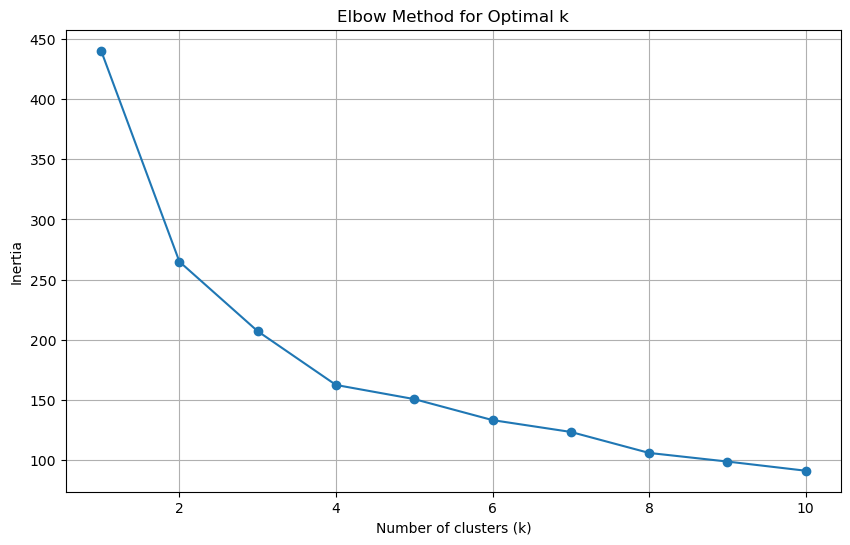

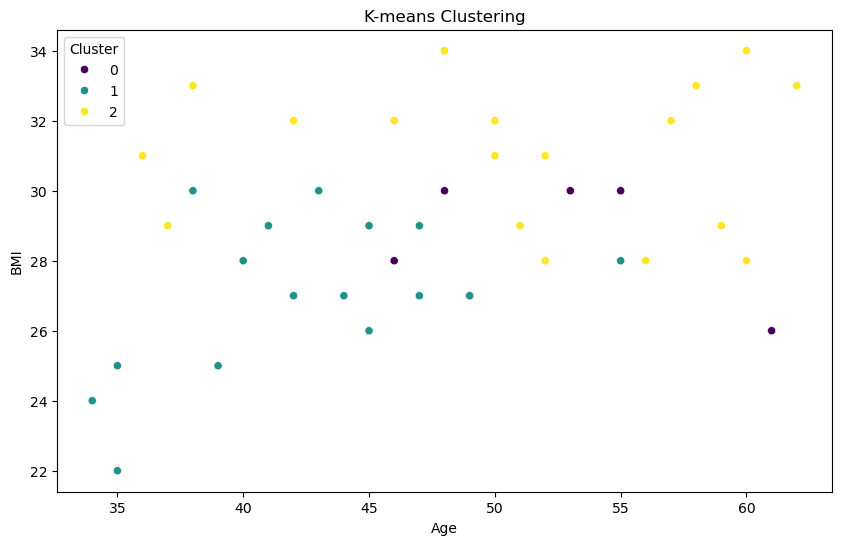


Cluster Centers:
   Patient ID        Age        BMI  Blood Pressure  Glucose Level  \
0  119.000000  52.000000  28.500000      133.833333     121.666667   
1  120.375000  42.437500  27.062500      129.937500      98.375000   
2  121.111111  50.777778  31.055556      139.888889     136.555556   

   Physical Activity Level  Family History_Yes  Diet Type_High Sugar  \
0                     2.00            1.000000          0.000000e+00   
1                     3.55            0.125000         -2.220446e-16   
2                     1.60            0.833333          1.000000e+00   

   Diet Type_Low Carb  Category_Healthy  Category_Pre-Diabetic  
0        1.000000e+00             0.000               0.833333  
1        1.875000e-01             0.875               0.125000  
2       -2.775558e-17             0.000               0.388889  


In [91]:
print("ZOBIA AHMED / 2022F-BSE-330 / LAB 06 / HOME-TASK:\n")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('patient_data_zobia.csv')
# Display the first few rows of the dataset
print(df.head())
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'o-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()
# Fit the K-means model with the optimal number of clusters
optimal_k = 3  # Choose the optimal number from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Cluster', palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()
# Display the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=df_encoded.columns)
print("\nCluster Centers:")
print(centers_df)